# Detect timewindow

### This notebook is second in the series of soiling detection pipeline notebooks

Data from other parks can be used in the following notebooks by changing the working_dir and filepaths <b>
    
CSVs imported in this notebook are created in the 1_preprocessing pipeline notebook <b>

   
 Author: Lisa Crowther

In [12]:
import pandas as pd
import numpy as np
import matplotlib
import copy
import matplotlib.pyplot as plt
from pathlib import Path

import datetime
from datetime import datetime

In [13]:
from sys import path as syspath
syspath.insert(1, '../src/')

## Import dataframes from previous notebook


In [14]:
working_dir = "../data/temp/park2/"


In [15]:
root_path = "../data/temp/park2/preprocessing/"
output_filepath = root_path + "df_output.csv"
EPI_filepath = root_path + "df_EPI.csv"
theor_output_filepath = root_path + "df_theor_output.csv"

In [16]:
def read_data(output_filepath, EPI_filepath, theor_output_filepath):
    output = pd.read_csv(output_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    EPI = pd.read_csv(EPI_filepath, delimiter = ',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    theor_output = pd.read_csv(theor_output_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return [output, EPI, theor_output]

In [17]:
output, EPI, theor_output = read_data(output_filepath, EPI_filepath, theor_output_filepath)


## String filter: 
Used only for Park 1 following clustering and removed worst strings <b>
    Not used otherwise: don't run the next 3 cells for other data

In [18]:
def remove_outlier_strings(df, sd_factor = 1):

    # Identify outlier strings based on deviation from 1 SD
    mean = df.mean()
    ub = mean.mean() + sd_factor*(mean.std())
    lb = mean.mean() - sd_factor*(mean.std())

    best_col = mean[(mean <= ub) & (mean >= lb)].index.to_list()
    worst_col = [i for i in mean.index if i not in best_col]

    # Identify strings with most variability
    sd = df.drop(worst_col, axis = 1).std()
    ub = sd.mean() + 3*(sd.std())
    lb = sd.mean() - 3*(sd.std())

    sd_df = sd.to_frame()
    best_col = sd[(sd <= ub) & (sd >= lb)].index.to_list()
    worst_col = worst_col + [i for i in sd.index if i not in best_col]
    return worst_col

In [19]:
#not done for Park 2, exlcude the next 2 cells
cluster_filepath = '../data/processed/park1/park1_string_clusters_filtered.csv'
df_clusters = pd.read_csv(cluster_filepath, delimiter=',')

In [20]:
bottom_cluster = df_clusters['bottom'].dropna().tolist()

EPI_sub = EPI.drop(
    columns = [
        i+"_(kW)" for i in bottom_cluster] + [
        col for col in EPI.columns.to_list(
        ) if col.startswith(
            "ST 2.7") or col.startswith(
            "ST 2.5.4")or col.startswith(
            "ST 4.4.1") or col.startswith(
            "ST 4.5.2")])

KeyError: "['ST 1.2.2_(kW)' 'ST 1.2.3_(kW)' 'ST 1.5.1_(kW)' 'ST 1.5.2_(kW)'\n 'ST 1.5.3_(kW)' 'ST 1.5.4_(kW)' 'ST 1.5.5_(kW)' 'ST 1.5.6_(kW)'\n 'ST 1.6.2_(kW)' 'ST 1.7.1_(kW)' 'ST 1.7.2_(kW)' 'ST 1.7.3_(kW)'\n 'ST 1.7.4_(kW)' 'ST 1.7.5_(kW)' 'ST 1.8.1_(kW)' 'ST 1.8.2_(kW)'\n 'ST 1.8.3_(kW)' 'ST 1.8.4_(kW)' 'ST 2.1.1_(kW)' 'ST 2.1.3_(kW)'\n 'ST 2.1.4_(kW)' 'ST 2.1.5_(kW)' 'ST 2.1.6_(kW)' 'ST 2.4.1_(kW)'\n 'ST 2.6.3_(kW)' 'ST 3.1.3_(kW)' 'ST 3.2.1_(kW)' 'ST 3.2.2_(kW)'\n 'ST 3.2.3_(kW)' 'ST 3.2.4_(kW)' 'ST 3.2.5_(kW)' 'ST 3.3.1_(kW)'\n 'ST 3.3.3_(kW)' 'ST 3.3.4_(kW)' 'ST 3.3.5_(kW)' 'ST 3.3.6_(kW)'\n 'ST 3.4.1_(kW)' 'ST 3.4.2_(kW)' 'ST 3.4.4_(kW)' 'ST 3.4.5_(kW)'\n 'ST 3.5.1_(kW)' 'ST 3.5.5_(kW)' 'ST 3.5.6_(kW)' 'ST 3.6.1_(kW)'\n 'ST 3.6.2_(kW)' 'ST 3.6.4_(kW)' 'ST 3.6.6_(kW)' 'ST 3.7.2_(kW)'\n 'ST 3.7.4_(kW)' 'ST 3.7.6_(kW)' 'ST 3.8.2_(kW)' 'ST 4.4.3_(kW)'\n 'ST 4.4.5_(kW)' 'ST 4.6.5_(kW)' 'ST 5.1.1_(kW)' 'ST 5.3.2_(kW)'\n 'ST 5.3.3_(kW)' 'ST 5.3.4_(kW)' 'ST 5.3.5_(kW)' 'ST 5.5.2_(kW)'\n 'ST 5.6.5_(kW)' 'ST 5.7.1_(kW)' 'ST 5.7.2_(kW)' 'ST 5.7.4_(kW)'\n 'ST 5.8.1_(kW)' 'ST 5.8.2_(kW)' 'ST 5.8.3_(kW)' 'ST 5.8.5_(kW)'\n 'ST 6.2.2_(kW)' 'ST 6.2.6_(kW)' 'ST 6.3.1_(kW)' 'ST 6.3.3_(kW)'\n 'ST 6.4.2_(kW)' 'ST 6.4.3_(kW)' 'ST 6.5.4_(kW)' 'ST 6.6.1_(kW)'\n 'ST 6.6.2_(kW)' 'ST 6.6.3_(kW)' 'ST 6.8.2_(kW)'] not found in axis"

In [21]:
#instead of the above 3 cells:
EPI_sub= copy.deepcopy(EPI)

## Time-of-day variation analysis

### Visualise median EPI of all strings over the day grouped by month

In [22]:
# USE EPI_sub for PARK1
EPI_plot= copy.deepcopy(EPI_sub)
EPI_plot['TimeOfDay']=EPI_plot.index
EPI_plot['MonthOfYear']=EPI_plot['TimeOfDay'].apply(lambda x: datetime.strftime(datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'), '%Y-%m'))
EPI_plot['TimeOfDay']=EPI_plot['TimeOfDay'].apply(lambda x: datetime.strftime(datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'), '%H:%M:%S'))

Text(0.5, 1.0, 'Median of all strings')

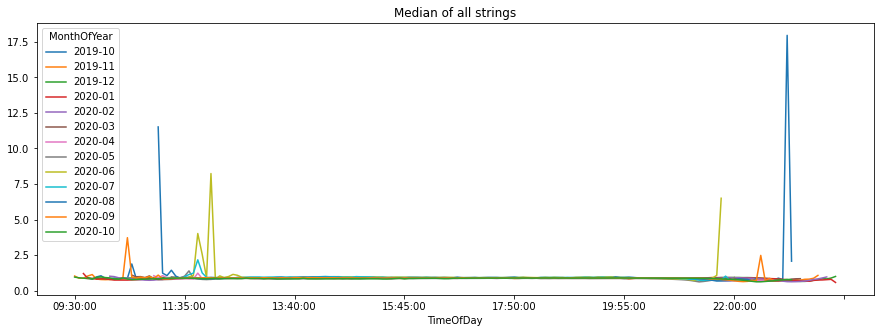

In [23]:

EPI_plot['med_strings']= EPI_plot.median(axis=1)
EPI_plot= EPI_plot.groupby(['TimeOfDay','MonthOfYear']).mean().unstack()

EPI_plot.med_strings.plot(figsize=(15,5))
plt.title('Median of all strings')

### Visualise the std of EPI across the day with varying start and end times
First set end time as 23:55 and find std variation of whole day with every hour for start time

In [24]:

def get_sdv_mean_range(df, starttimes, endtime):
    dfnew = pd.DataFrame()
    for start in starttimes:
        df_selected = df.between_time(start, endtime)
        df_resample=df_selected.resample('d')
        df_day_mean=df_resample.mean()
        df_day_std=df_resample.std()
        sdv_mean= df_day_std.mean().mean()
        df_temp=pd.DataFrame({'start':start, 'end':endtime, 'sdv_mean':[sdv_mean]})
        dfnew= pd.concat([dfnew, df_temp], ignore_index=True)
    dfnew.set_index('start', drop=True, inplace=True)
    return dfnew

In [25]:
EPI_sub.index= pd.to_datetime(EPI_sub.index, format='%Y-%m-%d %H:%M:%S')
alltimes=EPI_sub.index.strftime("%H:%M").unique()
starttimes=alltimes
endtime = '23:55'

In [26]:
sdv_starttimes= get_sdv_mean_range(EPI_sub, starttimes,endtime)

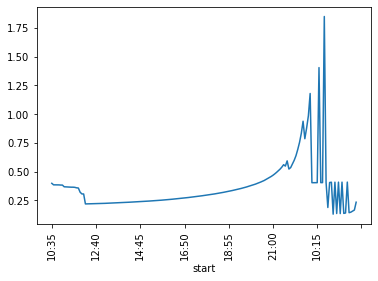

In [27]:
sdv_starttimes.sdv_mean.plot()
plt.xticks(rotation='vertical');

### Choose the start time according to best from above

In [28]:
def get_sdv_mean_range_end(df, starttime, endtimes):
    dfnew = pd.DataFrame()
    for end in endtimes:
        df_selected = df.between_time(starttime, end)
        df_resample=df_selected.resample('d')
        df_day_mean=df_resample.mean()
        df_day_std=df_resample.std()
        sdv_mean= df_day_std.mean().mean()
        df_temp=pd.DataFrame({'start':starttime, 'end':end, 'sdv_mean':[sdv_mean]})
        dfnew= pd.concat([dfnew, df_temp], ignore_index=True)
    dfnew.index=dfnew.end
    return dfnew

In [29]:
endtimes= alltimes
starttime = endtimes[alltimes.to_list().index('15:00')]
starttime

'15:00'

In [30]:

sdv_endtimes =get_sdv_mean_range_end(EPI_sub, starttime, endtimes)

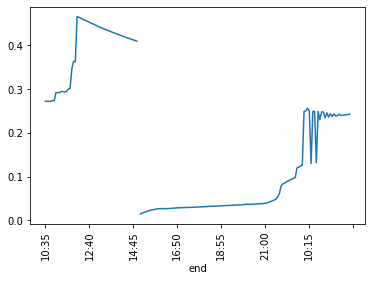

In [31]:
sdv_endtimes.sdv_mean.plot()
plt.xticks(rotation='vertical');

Choose end time from lowest point before variation starts rising again, minus 2h (18h here)

### Plot EPI over a chosen time window

In [32]:
def plot_EPI(df, year, month,day, starttime, endtime, col):
    df_selected = df[(df.index.year == year)&(df.index.month == month) & (df.index.day == day)].between_time(starttime, endtime)
    plt.plot(df_selected.index, df_selected[col])
    plt.xticks(rotation='vertical')
    plt.title('EPI: median all strings',fontsize= '20')
    plt.ylabel('EPI', fontsize='16')
    plt.xticks(fontsize='10')
    plt.show()

In [33]:
EPI_sub['med_strings']=EPI_sub.median(axis=1)

Plot first day of each month in 2020

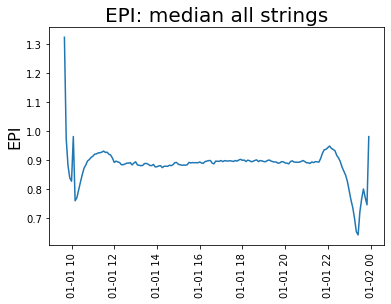

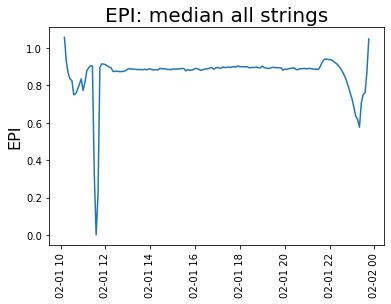

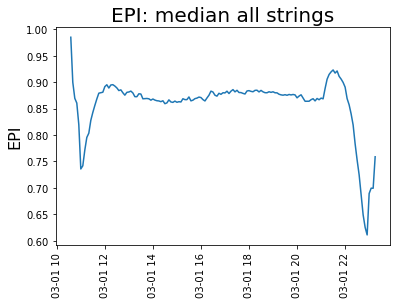

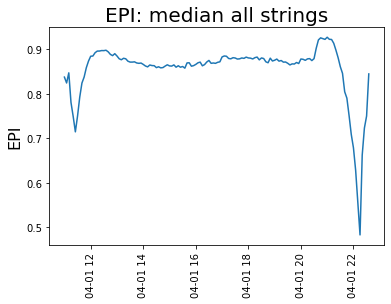

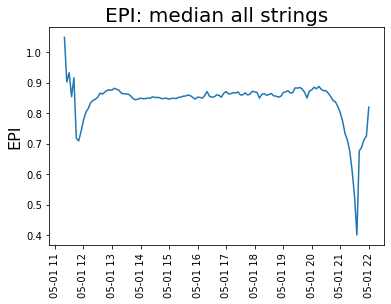

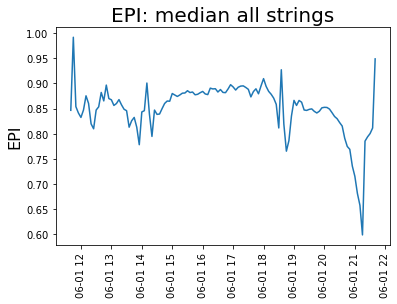

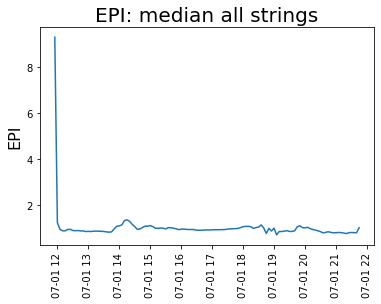

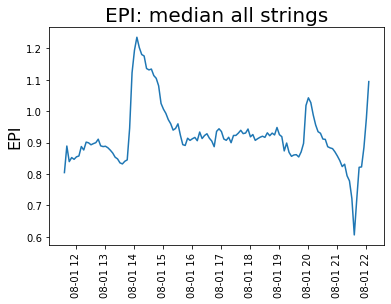

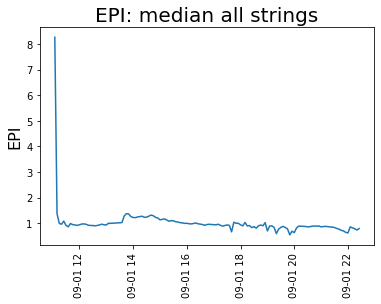

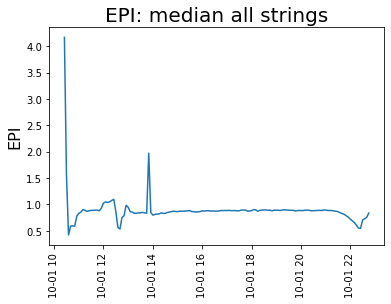

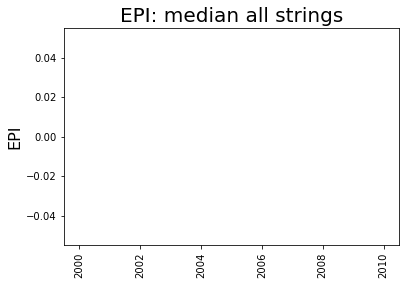

In [34]:
for month in range(1,12):
    plot_EPI(EPI_sub, 2020,month,1,'09:00','23:55','med_strings')

<AxesSubplot:xlabel='H'>

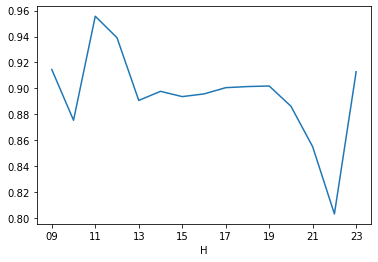

In [35]:
EPI_sub['H']=EPI_sub.index
EPI_sub['H']= EPI_sub['H'].apply(lambda x: datetime.strftime(datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'), '%H'))


EPI_sub_H =EPI_sub.groupby('H').agg('mean')
EPI_sub_H['med_strings'].plot()

Apply time mask with chosen times of day (most stable from above plots)

In [36]:
#takes df with 'H' column as above
def time_mask(df, start, end):
    #new.set_index('byH', drop=True, inplace=True)
    new =df[(df.H>start)&(df.H< end)]
    new.drop(columns='H', inplace=True)
    return new

In [37]:
time_masked_EPI = time_mask(EPI_sub, '15', '18')

/Users/lisacrowther/opt/anaconda3/envs/MLE/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
time_masked_EPI.drop(columns=['med_strings'],inplace=True)

In [39]:
time_masked_EPI['med_strings']=time_masked_EPI.loc[:, :].median(axis=1)

/Users/lisacrowther/opt/anaconda3/envs/MLE/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


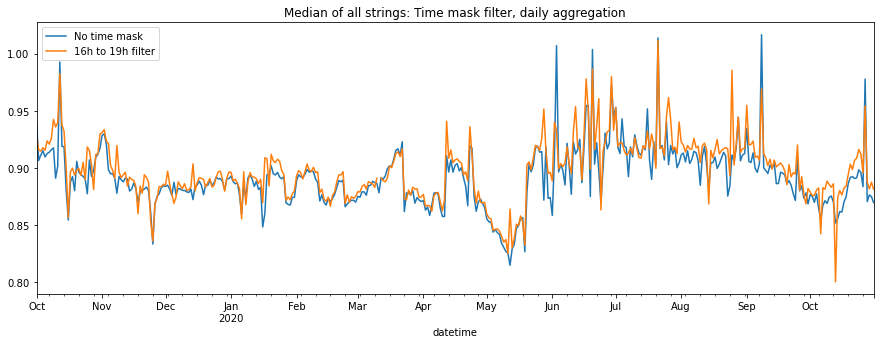

In [40]:

EPI_sub.resample(rule='D').median().med_strings.plot(label='No time mask')
time_masked_EPI.resample(rule='D').median().med_strings.plot(label='16h to 19h filter', figsize=(15,5))
plt.title('Median of all strings: Time mask filter, daily aggregation')
plt.legend()

In [41]:
EPI_sub

,CB 1.01_(kW),CB 1.02_(kW),CB 1.03_(kW),CB 1.04_(kW),CB 1.05_(kW),CB 1.06_(kW),CB 1.07_(kW),CB 1.08_(kW),CB 1.09_(kW),CB 1.10_(kW),...,CB 4.04_(kW),CB 4.05_(kW),CB 4.06_(kW),CB 4.07_(kW),CB 4.08_(kW),CB 4.09_(kW),CB 4.10_(kW),CB 4.11_(kW),med_strings,H
datetime,,,,,,,,,,,,,,,,,,,,,
2019-10-01 10:35:00,0.000000,64.948983,64.948983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,370.171054,111.638889,65.122685,0.000000,82.260234,65.122685,97.684028,132.249146,32.529998,10
2019-10-01 10:40:00,0.540430,1.513203,1.513203,0.432344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.689273,2.408528,1.513050,0.540375,1.911221,1.729200,2.053425,2.793323,1.086707,10
2019-10-01 10:45:00,0.489888,1.041011,1.041011,0.428652,0.063898,0.000000,0.000000,0.000000,0.122472,0.000000,...,3.856779,1.465576,1.038116,0.427460,1.157034,1.038116,1.282379,1.578313,0.797127,10
2019-10-01 10:50:00,0.000000,1.041863,1.041863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.919338,1.785197,1.041365,0.000000,1.315408,1.041365,1.353774,1.922520,0.521739,10
2019-10-01 10:55:00,0.000000,0.680441,0.680441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.864005,1.165335,0.679779,0.000000,0.858668,0.679779,0.883712,1.254976,0.340749,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 22:45:00,0.502189,0.542976,0.556997,0.572292,0.516044,0.546800,0.474877,0.516210,0.551898,0.505403,...,0.593153,0.571214,0.575074,0.553203,0.615904,0.567354,0.546770,0.584277,0.551898,22
2020-10-31 22:50:00,0.629162,0.693778,0.693778,0.690377,0.628127,0.625761,0.571347,0.595153,0.639364,0.592639,...,0.894320,0.766560,0.735104,0.674127,0.744553,0.735104,0.718166,0.725462,0.693778,22
2020-10-31 22:55:00,0.614755,0.686238,0.691004,0.671942,0.601702,0.590928,0.550080,0.562334,0.609990,0.566893,...,0.966908,0.779138,0.741548,0.674569,0.755397,0.751116,0.736764,0.750748,0.686238,22


In [42]:

def save_data(dataframes, names, root_dir, sub_dir):

    if root_dir[-1] != "/":
                root_dir += "/"

    if sub_dir[-1] != "/":
                root_dir += sub_dir + "/"

    for data, name in zip(dataframes, names):
        try:
            filepath_out = root_dir + name + ".csv"
            Path(root_dir).mkdir(parents=True, exist_ok=True)
            print(f"\tSaving {filepath_out}...")
            data.to_csv(filepath_out)
            print("\tDone.")
        except Exception as e:
            print(e)
            pass

In [43]:
time_masked_EPI.drop(columns=['med_strings'], inplace=True)

/Users/lisacrowther/opt/anaconda3/envs/MLE/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
EPI_sub.drop(columns=['med_strings','H'], inplace=True)

In [45]:

save_data([EPI_sub, time_masked_EPI], ["EPI_stringfilt", "EPI_timemask"], working_dir, "time_mask_filter")

	Saving ../data/temp/park2/time_mask_filter/EPI_stringfilt.csv...
	Done.
	Saving ../data/temp/park2/time_mask_filter/EPI_timemask.csv...
	Done.
